In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv("inequality_output.csv")
data.head()

,Step,AgentID,Wealth,Bracket,Pay
0,1,1,1.473320,Upper,0.30
1,1,2,1.303018,Upper,0.20
2,1,3,0.963673,Upper,0.13
3,1,4,0.783869,Upper,0.19
4,1,5,0.857320,Upper,0.26


In [3]:
bracs = data[data["Step"]==100]
bracs["Bracket"].value_counts()

Bracket
Lower     177
Middle     22
Upper       1
Name: count, dtype: int64

<Axes: >

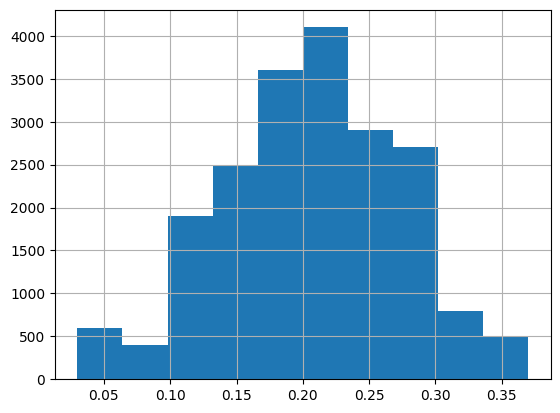

In [4]:
data["Pay"].hist()

In [5]:
final = data[data["Step"]==100]
final = list(final["Wealth"])


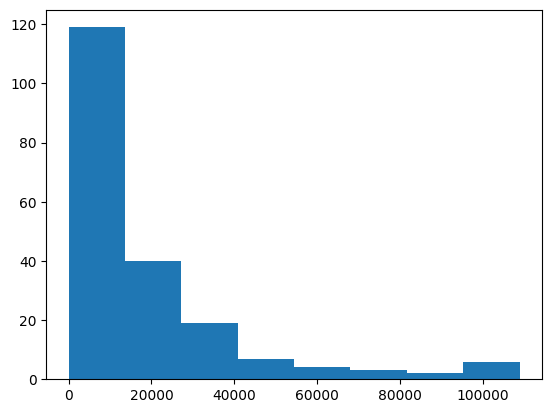

In [6]:
#uses sturges rule of bin creation
plt.hist(final, bins = int(np.log2(200) + 1))
None

In [7]:
min(final), max(final), sum(final)

(0.0, 108928.37755166458, 3684222.1486722254)

In [8]:
X= list(range(1, 201))
y = sorted(final)

In [9]:
len(y), len(X)

(200, 200)

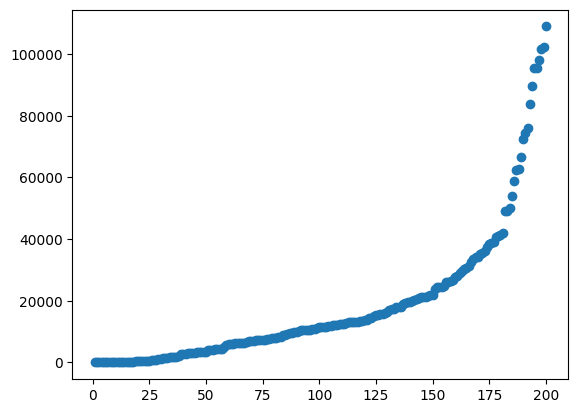

In [10]:
plt.scatter(X,y)

In [11]:
# Filter the DataFrame to include only rows where Step is 100
step_100_df = data.loc[data['Step'] == 100]

# Find the row with the minimum Wealth at Step 100
min_wealth_row = step_100_df.loc[step_100_df['Wealth'].idxmax()]
min_wealth_row

Step                 100
AgentID              113
Wealth     108928.377552
Bracket           Middle
Pay                 0.37
Name: 19912, dtype: object

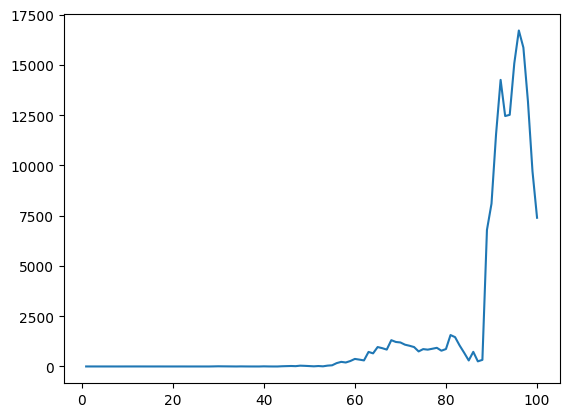

In [12]:
oneagent = data.loc[data['AgentID'] == 112]


# Plot the wealth of agent 14 over time
g = plt.plot(oneagent["Step"], oneagent["Wealth"])

In [13]:
oneagent["Wealth"]

111          1.164855
311          0.981282
511          0.715846
711          0.712329
911          0.434221
             ...     
19111    16711.810899
19311    15860.786473
19511    13185.431095
19711     9702.801565
19911     7397.054586
Name: Wealth, Length: 100, dtype: float64

In [14]:
ccdf =[]
for idx in range(len(final)): 
    if len(ccdf) == 0: 
        ccdf.append(final[idx])
    else: 
        ccdf.append(final[idx]+ccdf[-1])

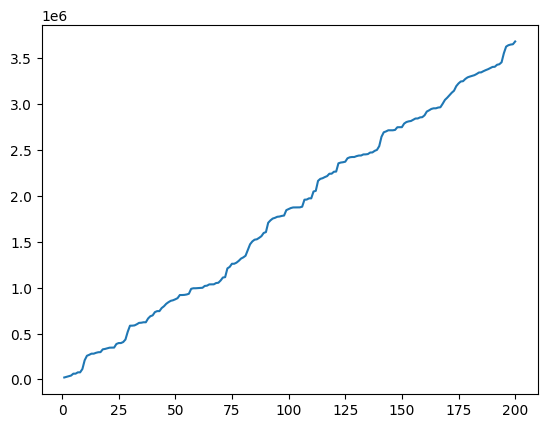

In [15]:
plt.plot(X,ccdf)


In [16]:
data2 = pd.read_csv("model_output.csv")
data2.head()

,Unnamed: 0,Gini,Total
0,0,0.149418,222.088154
1,1,0.223660,246.169342
2,2,0.274991,272.341846
3,3,0.323659,301.144949
4,4,0.368730,333.316763


In [17]:
data2["Gini"]

0     0.149418
1     0.223660
2     0.274991
3     0.323659
4     0.368730
        ...   
95    0.572492
96    0.577056
97    0.577082
98    0.567810
99    0.572114
Name: Gini, Length: 100, dtype: float64

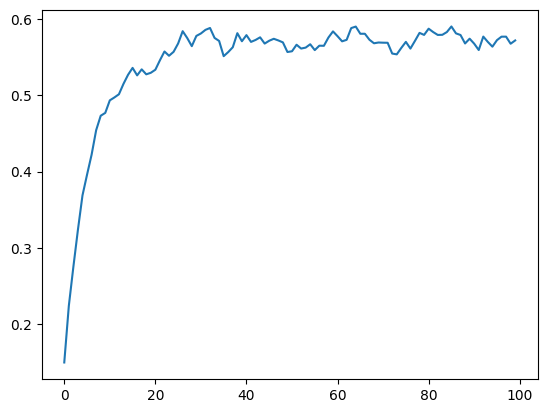

In [18]:
plt.plot(data2["Gini"])

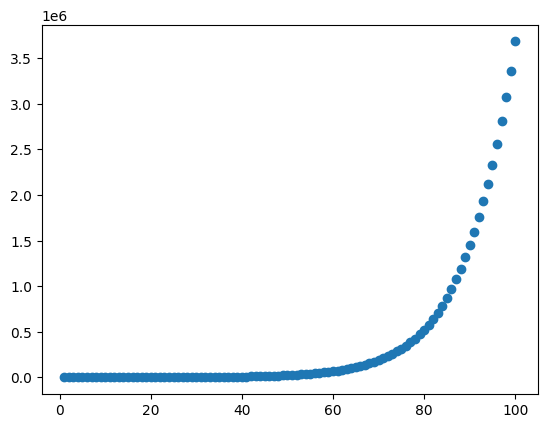

In [20]:
x = range(1,101)
plt.scatter(x,data2["Total"])

In [55]:
data2["Total"]

0     218.890638
1     230.641726
2     236.602236
3     237.437319
4     233.537525
         ...    
95    204.079206
96    204.079206
97    204.079206
98    204.079206
99    204.079206
Name: Total, Length: 100, dtype: float64

(array([ 5.,  6., 17., 23., 46., 50., 33.,  9.,  8.,  3.]),
 array([1.02508503, 1.03019659, 1.03530815, 1.04041971, 1.04553128,
        1.05064284, 1.0557544 , 1.06086596, 1.06597752, 1.07108908,
        1.07620065]),
 <BarContainer object of 10 artists>)

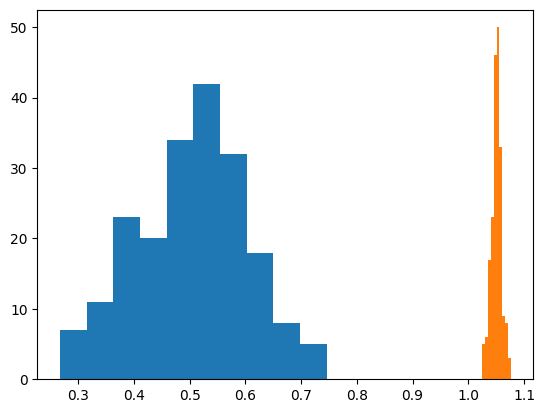

In [324]:
import numpy as np
payday_array = np.random.normal(loc=0.5,
                                          scale=0.1,
                                          size=200)
innovation_array = np.random.normal(loc=1.05,
                                          scale=0.01,
                                          size=200)
x = range(1,201)
plt.hist(payday_array)
plt.hist(innovation_array)

(array([ 4., 13., 33., 29., 42., 47., 19.,  7.,  4.,  2.]),
 array([0.03391978, 0.07281158, 0.11170339, 0.15059519, 0.18948699,
        0.22837879, 0.2672706 , 0.3061624 , 0.3450542 , 0.383946  ,
        0.4228378 ]),
 <BarContainer object of 10 artists>)

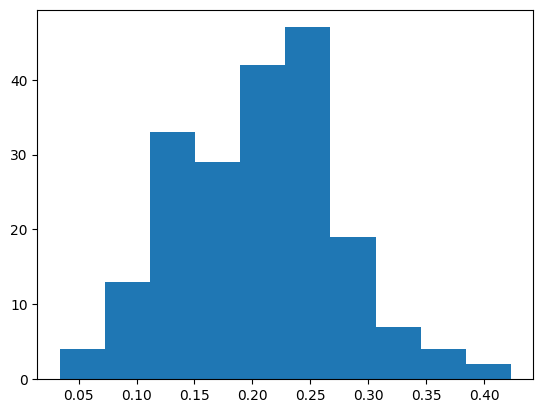

In [302]:
mean = 0.2      # mean of the distribution
sigma = 0.05     # original sigma, so variance is 2*sigma^2
variance = 2 * sigma**2

# Generate 200 data points from the Gaussian distribution
data_points = np.random.normal(mean, np.sqrt(variance), 200)
plt.hist(data_points)

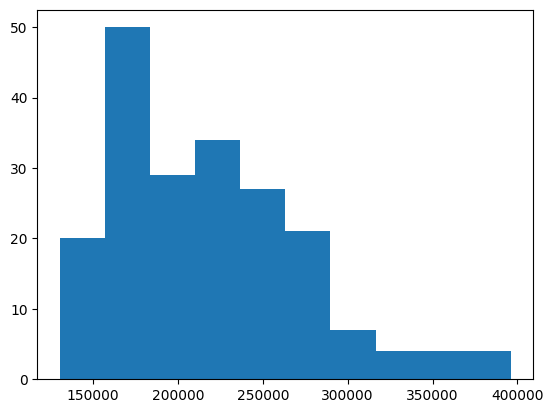

In [303]:
from matplotlib.figure import Figure

fig = Figure()
ax = fig.subplots()
# Note: you have to use Matplotlib's OOP API instead of plt.hist
# because plt.hist is not thread-safe.
ax.hist(final, bins=10)
fig

In [304]:
import numpy as np
from scipy.stats import expon

def calculate_survival_cost_exponential_only(exp_scale, survival_percentile=0.1):
    """
    Calculate the basic cost for survival using an exponential wealth distribution.
    
    Parameters:
    - exp_scale: scale parameter (1/lambda) for the exponential distribution.
    - survival_percentile: percentile within the exponential distribution where survival cost is assessed.
    
    Returns:
    - survival_cost: estimated wealth level for survival.
    """
    # Calculate the survival cost at the given percentile within the exponential distribution
    survival_cost = expon.ppf(survival_percentile, scale=exp_scale)
    
    return survival_cost

# Parameters for the exponential distribution
exp_scale = 500  # scale parameter for the exponential distribution (1/lambda)

# Calculate the basic survival cost, assessing at the 10th percentile
survival_cost = calculate_survival_cost_exponential_only(exp_scale)
print(f"The estimated basic cost for survival is ${survival_cost:.2f}")


The estimated basic cost for survival is $52.68


In [305]:
exp_scale = np.mean(data.loc[data['Step'] == 1])
survival_cost = expon.ppf(0.1, scale=exp_scale)
survival_cost

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [242]:
# Extract the wealthiest agent at each step
wealthiest_agents = data.loc[data.groupby('Step')['Wealth'].idxmax()]
wealthiest_agents = wealthiest_agents[wealthiest_agents["Step"] <= 50]
len(wealthiest_agents), wealthiest_agents

(50,
       Step  AgentID        Wealth  Innovation   Pay
 0        1        1  1.000000e+00        1.05  0.20
 358      2      159  8.144407e+00        1.06  0.35
 496      3       97  1.342538e+01        1.03  0.32
 775      4      176  2.300682e+01        1.05  0.34
 826      5       27  3.609790e+01        1.06  0.33
 1180     6      181  5.074646e+01        1.05  0.39
 1226     7       27  7.590978e+01        1.06  0.33
 1426     8       27  1.108356e+02        1.06  0.33
 1626     9       27  1.776604e+02        1.06  0.33
 1826    10       27  2.517659e+02        1.06  0.33
 2026    11       27  3.246161e+02        1.06  0.33
 2386    12      187  3.873405e+02        1.06  0.33
 2586    13      187  4.251497e+02        1.06  0.33
 2696    14       97  4.933474e+02        1.03  0.32
 2873    15       74  7.537733e+02        1.04  0.34
 3175    16      176  9.041283e+02        1.05  0.34
 3375    17      176  1.153229e+03        1.05  0.34
 3502    18      103  1.971949e+03       

In [243]:
rich = list(wealthiest_agents["AgentID"].unique())
rich

[np.int64(1),
 np.int64(159),
 np.int64(97),
 np.int64(176),
 np.int64(27),
 np.int64(181),
 np.int64(187),
 np.int64(74),
 np.int64(103),
 np.int64(152),
 np.int64(28),
 np.int64(114),
 np.int64(42),
 np.int64(46)]

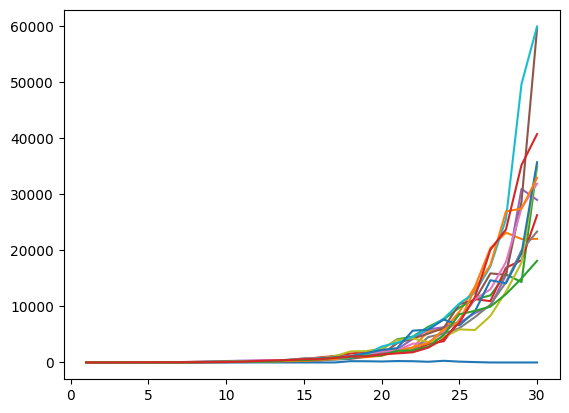

In [244]:
data2 = data[data["Step"] <= 30]
for i in rich: 
    oneagent = data2.loc[data['AgentID'] == int(i) ]
    g = plt.plot(oneagent["Step"], oneagent["Wealth"])